## Logistic Regression 

The dataset is affairs dataset and comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

## Problem Statement
We treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and try to predict the classification for each woman.

In [1]:
## importing Modules required for data analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

C:\Users\meenakshi313290\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
## load dataset
data = sm.datasets.fair.load_pandas().data

In [3]:
## understanding the data attributes
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [5]:
## adding "affair" column to the dataframe where 1 represent - having affair and 0 represent not in affair
data['affair']=(data.affairs >0).astype(int)

In [6]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [7]:
## Women having affair are high in number and also it can be observed that they rate low on marriage importance

In [8]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [9]:
## Age, Children, married years lower the marriage rating

## Data Visualization

Text(0,0.5,'Frequency')

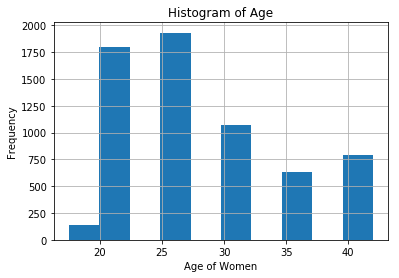

In [10]:
%matplotlib inline

## histogram of age
data.age.hist()
plt.title("Histogram of Age")
plt.xlabel("Age of Women")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

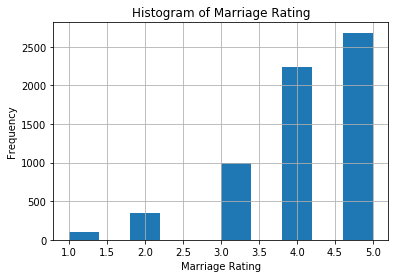

In [11]:
## histogram of Marriage Rating
data.rate_marriage.hist()
plt.title("Histogram of Marriage Rating")
plt.xlabel("Marriage Rating")
plt.ylabel("Frequency")


In [12]:
## Pivot of Marriage rating and affair
pd.crosstab(data.rate_marriage, data.affair)

affair,0,1
rate_marriage,,
1.0,25,74
2.0,127,221
3.0,446,547
4.0,1518,724
5.0,2197,487


Text(0,0.5,'Frequency')

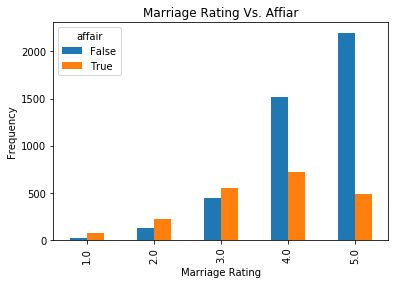

In [13]:
## bar plot of Marriage rating and affair
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind = 'bar')
plt.title("Marriage Rating Vs. Affiar")
plt.xlabel("Marriage Rating")
plt.ylabel("Frequency")

In [17]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
                  data, return_type="dataframe")


In [18]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [20]:
model = LogisticRegression()

In [21]:
model = model.fit(X,y)

In [22]:
model.score(X,y)

0.7258875274897895

##  Model accuracy is at 72%, can be accepted

In [23]:
## % of women having affair as per data
y.mean()

0.3224945020420987

In [51]:
## let us look at co-efficients
output = pd.DataFrame(model.coef_,columns = X.columns)
print(output)


   Intercept     occ_2    occ_3     occ_4     occ_5     occ_6  occ_husb_2  \
0   1.489862  0.188042  0.49892  0.250641  0.838977  0.834008     0.19058   

   occ_husb_3  occ_husb_4  occ_husb_5  occ_husb_6  rate_marriage       age  \
0     0.29778    0.161353    0.187718    0.193949      -0.703117 -0.058418   

   yrs_married  children  religious      educ  
0     0.105677   0.01692  -0.371134  0.004016  


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [57]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

[[0.3514263  0.6485737 ]
 [0.90952493 0.09047507]
 [0.72576699 0.27423301]
 ...
 [0.55737109 0.44262891]
 [0.81213807 0.18786193]
 [0.74729545 0.25270455]]


In [58]:
## Classifier is predicting as 1 whereever the probability in the second column is > 0.5

In [63]:
## Model Evaluation Metrics
metrics.accuracy_score(y_test, predicted)


0.7298429319371728

In [64]:
metrics.roc_auc_score(y_test, probs[:, 1])

0.7459619860896347

##  We can observe that the accuracy is same as the trained data set ~72%, 